In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import ast
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
%matplotlib inline
import re




credits=pd.read_csv('tmdb_5000_credits.csv')
movies=pd.read_csv('tmdb_5000_movies.csv')
total_movies=pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')


# I.Reading DATA

We will use 4 datasets credits and movies will be used for Demographic and Contentbase Recommendation system. For Collobrative recomendation system we need ratings dataset to identify users choices.

In [2]:
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [3]:
total_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [4]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [5]:
movies = movies.merge(credits, on='title')

In [6]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

In [7]:
movies.sort_values(by="release_date",ascending=False)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
4262,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",http://www.growingupsmithmovie.com,426469,[],en,Growing Up Smith,"In 1979, an Indian family moves to America wit...",0.710870,[],...,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It’s better to stand out than to fit in.,Growing Up Smith,7.4,7,426469,"[{""cast_id"": 4, ""character"": ""Smith Bhatnagar""...","[{""credit_id"": ""582e0bdfc3a368772600b6c1"", ""de..."
3413,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,325373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 46...",en,Two Lovers and a Bear,Set in a small town near the North Pole where ...,3.139294,[],...,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Two Lovers and a Bear,6.8,27,325373,"[{""cast_id"": 0, ""character"": ""Roman"", ""credit_...","[{""credit_id"": ""572b7278c3a3684806002e6e"", ""de..."
3307,8000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,374461,"[{""id"": 1650, ""name"": ""cook""}, {""id"": 6054, ""n...",en,Mr. Church,A unique friendship develops when a little gir...,7.828459,"[{""name"": ""Envision Media Arts"", ""id"": 19456},...",...,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He was the one person she could always count on.,Mr. Church,7.0,129,374461,"[{""cast_id"": 6, ""character"": ""Henry Church"", ""...","[{""credit_id"": ""5710041cc3a3684122000ee4"", ""de..."
4726,8500000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxsearchlight.com/thebirthofanation/,339408,"[{""id"": 2831, ""name"": ""slavery""}]",en,The Birth of a Nation,"Nat Turner, a former slave in America, leads a...",9.452808,"[{""name"": ""Phantom Four"", ""id"": 423}, {""name"":...",...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Untold Story of Nat Turner,The Birth of a Nation,6.5,178,339408,"[{""cast_id"": 2, ""character"": ""Nat Turner"", ""cr...","[{""credit_id"": ""56af01149251417e2900b61c"", ""de..."
3254,0,"[{""id"": 12, ""name"": ""Adventure""}]",http://www.focusfeatures.com/kicks,385736,"[{""id"": 3405, ""name"": ""blow job""}, {""id"": 1173...",en,Kicks,When his hard-earned kicks get snatched by a l...,3.467923,"[{""name"": ""Bystorm Films"", ""id"": 2903}, {""name...",...,80.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They aren't just shoes,Kicks,7.5,18,385736,"[{""cast_id"": 2, ""character"": ""Marlon"", ""credit...","[{""credit_id"": ""570f87d992514102b9002c1e"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,905,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",de,Die Büchse der Pandora,The rise and inevitable fall of an amoral but ...,1.824184,"[{""name"": ""Nero Films"", ""id"": 4903}]",...,109.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}]",Released,NaN,Pandora's Box,7.6,45,905,"[{""cast_id"": 7, ""character"": ""Lulu"", ""credit_i...","[{""credit_id"": ""52fe428ac3a36847f8026e81"", ""de..."
2644,92620000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,19,"[{""id"": 312, ""name"": ""man vs machine""}, {""id"":...",de,Metropolis,In a futuristic city sharply divided between t...,32.351527,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,153.0,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,There can be no understanding between the hand...,Metropolis,8.0,657,19,"[{""cast_id"": 10, ""character"": ""Maria"", ""credit...","[{""credit_id"": ""52fe420fc3a36847f8000c55"", ""de..."
4667,245000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,3060,"[{""id"": 2504, ""name"": ""world war i""}, {""id"": 1...",en,The Big Parade,The story of an idle rich boy who joins the US...,0.78574

In [8]:
movies[movies['id']==862]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
1547,30000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://toystory.disney.com/toy-story,862,"[{""id"": 931, ""name"": ""jealousy""}, {""id"": 4290,...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",73.640445,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]",...,81.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Toy Story,7.7,5269,862,"[{""cast_id"": 14, ""character"": ""Woody (voice)"",...","[{""credit_id"": ""52fe4284c3a36847f8024f55"", ""de..."


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [10]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [11]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

In [12]:
#To clean our data I created a two functions
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L
def clean_title(title):
    return re.sub("[^a-zA-Z0-9 ]","",title)

In [13]:
#Applying functions 

movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['spoken_languages'] = movies['spoken_languages'].apply(convert)
movies['production_companies'] = movies['production_companies'].apply(convert)
movies['production_countries'] = movies['production_countries'].apply(convert)
movies['cast'] = movies['cast'].apply(convert)
movies['crew'] = movies['crew'].apply(convert)

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [15]:
# Selected the columns that matters for our recommendation system

movies = movies[['movie_id','title','overview','genres','keywords','cast','crew','vote_average','vote_count','popularity']]

In [16]:
movies

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,vote_count,popularity
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",7.2,11800,150.437577
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",6.9,4500,139.082615
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",6.3,4466,107.376788
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",7.6,9106,112.312950
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",6.1,2124,43.926995
...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[Robert Rodriguez, Robert Rodriguez, Robert Ro...",6.6,238,14.269792
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",[],"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...","[Edward Burns, Edward Burns, Edward Burns, Wil...",5.9,5,0.642552
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...","[Carla Hetland, Harvey Kahn, Adam Sliwinski, M...",7.0,6,1.444476
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...","[Daniel Hsia, Daniel Hsia]",5.7,7,0.857008


In [211]:
movies.sort_values(by='movie_id')

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,vote_count,popularity,id
3773,5,Four Rooms,It's Ted the Bellhop's first night on the job....,"[Crime, Comedy]","[hotel, new year's eve, witch, bet, hotel room...","[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Allison Anders, Allison Anders, Alexandre Roc...",6.5,530,22.876230,5
2917,11,Star Wars,Princess Leia is captured and held hostage by ...,"[Adventure, Action, Science Fiction]","[android, galaxy, hermit, death star, lightsab...","[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...","[George Lucas, George Lucas, George Lucas, Gar...",8.1,6624,126.393695,11
328,12,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...","[Animation, Family]","[father son relationship, harbor, underwater, ...","[Albert Brooks, Ellen DeGeneres, Alexander Gou...","[Andrew Stanton, Andrew Stanton, Andrew Stanto...",7.6,6122,85.688789,12
809,13,Forrest Gump,A man with a low IQ has accomplished great thi...,"[Comedy, Drama, Romance]","[vietnam veteran, hippie, mentally disabled, r...","[Tom Hanks, Robin Wright, Gary Sinise, Mykelti...","[Alan Silvestri, Robert Zemeckis, Winston Groo...",8.2,7927,138.133331,13
2522,14,American Beauty,"Lester Burnham, a depressed suburban father in...",[Drama],"[male nudity, female nudity, adultery, midlife...","[Kevin Spacey, Annette Bening, Thora Birch, We...","[Thomas Newman, Sam Mendes, Alan Ball, Alan Ba...",7.9,3313,80.878605,14
...,...,...,...,...,...,...,...,...,...,...,...
187,417859,Puss in Boots,"Long before he even met Shrek, the notorious f...","[Action, Adventure, Animation, Family, Fantasy]","[adventure, fairy-tale figure]","[Antonio Banderas, Salma Hayek, Zach Galifiana...","[Andrew Adamson, Leslee Feldman, Guillaume Are...",6.4,451,20.678787,417859
4631,426067,Midnight Cabaret,A Broadway producer puts on a play with a Devi...,[Horror],[],"[Lisa Hart Carroll, Michael Des Barres, Paul D...",[Pece Dingo],0.0,0,0.001389,426067
4262,426469,Growing Up Smith,"In 1979, an Indian family moves to America wit...","[Comedy, Family, Drama]",[],"[Roni Akurati, Brighton Sharbino, Jason Lee, A...","[Frank Lotito, Gregory Scott Houghton, Josh Ra...",7.4,7,0.710870,426469
4058,433715,8 Days,"After sneaking to a party with her friends, 16...","[Thriller, Drama]","[christian film, sex trafficking]","[Nicole Smolen, Kim Baldwin, Ariana Stephens, ...","[Jaco Booyens, Philipa A. Booyens, Ferdinand G...",0.0,0,0.015295,433715


In [17]:
movies.isnull().sum()

movie_id        0
title           0
overview        3
genres          0
keywords        0
cast            0
crew            0
vote_average    0
vote_count      0
popularity      0
dtype: int64

In [18]:
movies.dropna(inplace=True)

C:\Users\akoft\AppData\Local\Temp\ipykernel_7984\3786870272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=True)


In [19]:
movies.isnull().sum()

movie_id        0
title           0
overview        0
genres          0
keywords        0
cast            0
crew            0
vote_average    0
vote_count      0
popularity      0
dtype: int64

# I.Popularity Based Filtering

Before getting started with this -

we need a metric to score or rate movie
Calculate the score for every movie
Sort the scores and recommend the best rated movie to the users.
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-

where,


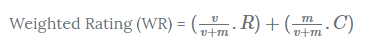

    v is the number of votes for the movie
    m is the minimum votes required to be listed in the chart;
    R is the average rating of the movie; And
    C is the mean vote across the whole report
    We already have v(vote_count) and R (vote_average) and C can be calculated as!

In [20]:
C = movies["vote_average"].mean()
m=movies["vote_count"].quantile(0.85)

In [21]:
print(C,m)

6.093258426966287 1303.75


In [22]:
q_movies = movies.copy().loc[movies['vote_count'] >= m]
q_movies.shape

(721, 10)

In [23]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [24]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [25]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 10 movies
q_movies[['title', 'vote_count', 'vote_average', 'score','genres']].head(10)

,title,vote_count,vote_average,score,genres
1887,The Shawshank Redemption,8205,8.5,8.170010,"[Drama, Crime]"
662,Fight Club,9413,8.3,8.031538,[Drama]
3237,Pulp Fiction,8428,8.3,8.004366,"[Thriller, Crime]"
65,The Dark Knight,12002,8.2,7.993573,"[Drama, Action, Crime, Thriller]"
3342,The Godfather,5893,8.4,7.982115,"[Drama, Crime]"
96,Inception,13752,8.1,7.926227,"[Action, Thriller, Science Fiction, Mystery, A..."
809,Forrest Gump,7927,8.2,7.902444,"[Comedy, Drama, Romance]"
95,Interstellar,10867,8.1,7.885035,"[Adventure, Drama, Science Fiction]"
329,The Lord of the Rings: The Return of the King,8064,8.1,7.820713,"[Adventure, Fantasy, Action]"
1996,The Empire Strikes Back,5879,8.2,7.817603,"[Adventure, Action, Science Fiction]"


In [26]:
a = 'Thriller'
a_movies = q_movies.copy()
a_movies=a_movies[['title', 'vote_count', 'vote_average', 'score','genres']]

In [27]:
a_movies[a_movies['genres'].str.contains(a, regex=False)]

,title,vote_count,vote_average,score,genres
3237,Pulp Fiction,8428,8.3,8.004366,"[Thriller, Crime]"
65,The Dark Knight,12002,8.2,7.993573,"[Drama, Action, Crime, Thriller]"
96,Inception,13752,8.1,7.926227,"[Action, Thriller, Science Fiction, Mystery, A..."
1559,Se7en,5765,8.1,7.729879,"[Crime, Mystery, Thriller]"
2528,The Imitation Game,5723,8.0,7.646221,"[History, Drama, Thriller, War]"
...,...,...,...,...,...
166,G.I. Joe: Retaliation,3025,5.4,5.608798,"[Adventure, Action, Science Fiction, Thriller]"
217,Ghost Rider,1712,5.2,5.586168,"[Thriller, Action, Fantasy, Horror]"
1157,Fifty Shades of Grey,3254,5.2,5.455518,"[Drama, Romance, Thriller]"
337,A Good Day to Die Hard,3493,5.2,5.442786,"[Action, Thriller]"


In [28]:
def gender_selector(a):
    return a_movies[a_movies['genres'].str.contains(a, regex=False)]

In [29]:
gender_selector('Drama')

,title,vote_count,vote_average,score,genres
1887,The Shawshank Redemption,8205,8.5,8.170010,"[Drama, Crime]"
662,Fight Club,9413,8.3,8.031538,[Drama]
65,The Dark Knight,12002,8.2,7.993573,"[Drama, Action, Crime, Thriller]"
3342,The Godfather,5893,8.4,7.982115,"[Drama, Crime]"
809,Forrest Gump,7927,8.2,7.902444,"[Comedy, Drama, Romance]"
...,...,...,...,...,...
189,Noah,2350,5.6,5.776007,"[Drama, Adventure]"
898,The Twilight Saga: New Moon,2436,5.6,5.771960,"[Adventure, Fantasy, Drama, Romance]"
165,Hulk,1533,5.3,5.664576,"[Drama, Action, Science Fiction]"
3599,Spring Breakers,1551,5.0,5.499286,"[Drama, Crime]"


Text(0.5, 1.0, 'Popular Movies')

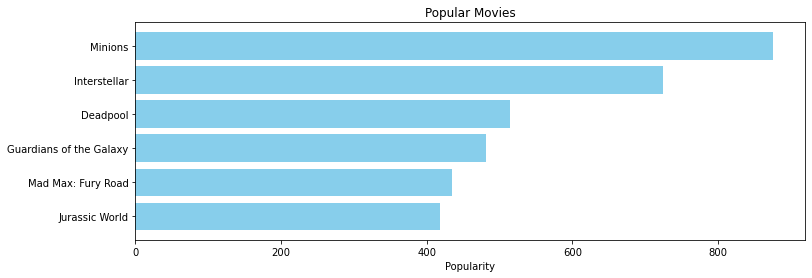

In [30]:
pop= movies.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# II.Contentbase Filtering

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.



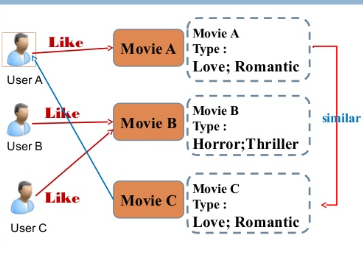

In [31]:
movies['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
movies['overview'] = movies['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(movies['overview'])

tfidf_matrix.shape

C:\Users\akoft\AppData\Local\Temp\ipykernel_7984\124464441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['overview'] = movies['overview'].fillna('')


(4806, 20978)

In [33]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [34]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [139]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    movie_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]
    movies_recc=movies[['title','genres']].iloc[movie_indices].head(10)
    
    return movies_recc

In [140]:
def get_recommendations_withpoints(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores]
    movies_rec=movies[['title','genres']].iloc[movie_indices].copy()
    scores = [i[1] for i in sim_scores]
    movies_rec['con_scores']=scores
    
    return movies_rec

In [141]:
get_recommendations_withpoints('Married Life')

,title,genres,con_scores
2891,Duma,"[Adventure, Drama, Family]",1.000000
1525,Bogus,"[Fantasy, Comedy, Family]",0.243251
1697,Cry Freedom,[Drama],0.194481
4428,The Pet,"[Drama, Thriller]",0.166847
1560,District 9,[Science Fiction],0.154624
...,...,...,...
4804,El Mariachi,"[Action, Crime, Thriller]",0.000000
4805,Newlyweds,"[Comedy, Romance]",0.000000
4806,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]",0.000000
4807,Shanghai Calling,[],0.000000


In [142]:
get_recommendations('Married Life')

,title,genres
2891,Duma,"[Adventure, Drama, Family]"
1525,Bogus,"[Fantasy, Comedy, Family]"
1697,Cry Freedom,[Drama]
4428,The Pet,"[Drama, Thriller]"
1560,District 9,[Science Fiction]
1482,Mandela: Long Walk to Freedom,"[Drama, History]"
3946,Tusk,"[Comedy, Horror]"
4330,Faith Like Potatoes,[Drama]
742,The Boxtrolls,"[Animation, Comedy, Family, Fantasy]"
3943,Tsotsi,"[Crime, Drama]"


# III.Collobrative Filtering

The collaborative filtering method is based on gathering and analyzing data on user’s behavior. This includes the user’s online activities and predicting what they will like based on the similarity with other users.

In [37]:
ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [38]:
links = pd.read_csv('links.csv')

In [39]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


In [40]:
links = pd.read_csv('links.csv')
links['id']=links['tmdbId']
ratings = ratings.merge(links, on='movieId')
links

,movieId,imdbId,tmdbId,id
0,1,114709,862.0,862.0
1,2,113497,8844.0,8844.0
2,3,113228,15602.0,15602.0
3,4,114885,31357.0,31357.0
4,5,113041,11862.0,11862.0
...,...,...,...,...
45838,176269,6209470,439050.0,439050.0
45839,176271,2028550,111109.0,111109.0
45840,176273,303758,67758.0,67758.0
45841,176275,8536,227506.0,227506.0


In [41]:
ratings = ratings.merge(links, on='movieId')

In [42]:
ratings

,userId,movieId,rating,timestamp,imdbId,tmdbId,id
0,1,307,3.5,1256677221,108394,108.0,108.0
1,6,307,4.0,832059248,108394,108.0,108.0
2,56,307,4.0,1383625728,108394,108.0,108.0
3,71,307,5.0,1257795414,108394,108.0,108.0
4,84,307,3.0,999055519,108394,108.0,108.0
...,...,...,...,...,...,...,...
27668586,282374,168694,4.0,1486169129,2133298,83729.0,83729.0
27668587,282374,168698,2.5,1486169144,91742,177979.0,177979.0
27668588,283000,117857,3.5,1417317969,3213142,267355.0,267355.0
27668589,283000,133409,3.5,1431539331,90702,147055.0,147055.0


In [43]:
movie_id = 1

In [44]:
sim_users = ratings[(ratings["movieId"] == movie_id) &(ratings["rating"] >= 4)]["userId"].unique()

In [45]:
sim_users

array([     4,     10,     14, ..., 283217, 283219, 283228], dtype=int64)

In [46]:
sim_user_recs=ratings[(ratings["userId"].isin(sim_users)&(ratings["rating"] >=4))]["movieId"]

In [47]:
sim_user_recs

3              307
22             307
25             307
28             307
29             307
             ...  
27668343    130954
27668348    117428
27668379    137134
27668401    173487
27668498    170711
Name: movieId, Length: 5450294, dtype: int64

In [48]:
sim_user_recs=sim_user_recs.value_counts(())/ len(sim_users)

sim_user_recs = sim_user_recs[sim_user_recs> 0.1]


In [49]:
sim_user_recs

1       1.000000
318     0.504934
260     0.504310
356     0.482903
296     0.454568
          ...   
300     0.100666
1500    0.100622
1101    0.100421
1199    0.100376
3471    0.100310
Name: movieId, Length: 236, dtype: float64

In [50]:
all_users = ratings[(ratings["movieId"].isin(sim_user_recs.index))&(ratings["rating"]>4)]

all_users_recs = all_users["movieId"].value_counts()/len(all_users["userId"].unique())

In [51]:
all_users_recs

318     0.283040
296     0.221324
2571    0.193318
356     0.192103
593     0.182014
          ...   
1500    0.016904
2081    0.016603
3751    0.016328
300     0.015716
586     0.014933
Name: movieId, Length: 236, dtype: float64

In [52]:
rec_percentages = pd.concat([sim_user_recs,all_users_recs],axis=1)
rec_percentages.columns= ["similar","all"]

In [53]:
rec_percentages

,similar,all
1,1.000000,0.099855
318,0.504934,0.283040
260,0.504310,0.180038
356,0.482903,0.192103
296,0.454568,0.221324
...,...,...
300,0.100666,0.015716
1500,0.100622,0.016904
1101,0.100421,0.017562
1199,0.100376,0.033314


In [54]:
rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]

In [55]:
rec_percentages = rec_percentages.sort_values("score", ascending=False)
rec_percentages

,similar,all,score
1,1.000000,0.099855,10.014472
2355,0.176049,0.019799,8.891738
648,0.188590,0.024441,7.716286
3114,0.298055,0.041016,7.266746
592,0.189904,0.026502,7.165562
...,...,...,...
58559,0.216903,0.107999,2.008375
858,0.325165,0.166465,1.953358
2959,0.313604,0.165317,1.896988
79132,0.176472,0.096272,1.833055


In [56]:
movies['id']=movies['movie_id']

C:\Users\akoft\AppData\Local\Temp\ipykernel_7984\3860393522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['id']=movies['movie_id']


In [57]:
rec_percentages.merge(movies, left_index=True,right_on="id")

,similar,all,score,movie_id,title,overview,genres,keywords,cast,crew,vote_average,vote_count,popularity,id
2183,0.176049,0.019799,8.891738,2355,Reign Over Me,A man who lost his family in the September 11 ...,[Drama],"[confidence, trauma, leaving one's family, chi...","[Adam Sandler, Don Cheadle, Jada Pinkett Smith...","[Sharon Bialy, Deborah Lynn Scott, Jack Giarra...",7.1,334,20.827780,2355
4216,0.189904,0.026502,7.165562,592,The Conversation,Surveillance expert Harry Caul (Gene Hackman) ...,"[Crime, Drama, Mystery]","[san francisco, paranoia, audio tape, wiretap,...","[Gene Hackman, John Cazale, Frederic Forrest, ...","[Walter Murch, Francis Ford Coppola, Francis F...",7.5,372,20.810292,592
2543,0.101312,0.014933,6.784610,586,Wag the Dog,"During the final weeks of a presidential race,...","[Comedy, Drama]","[washington d.c., rape, cia, usa president, wa...","[Dustin Hoffman, Robert De Niro, Anne Heche, W...","[Debra Zane, Robert Richardson, Robert De Niro...",6.7,270,13.581966,586
3713,0.129915,0.020920,6.210045,141,Donnie Darko,"After narrowly escaping a bizarre accident, a ...","[Fantasy, Drama, Mystery]","[parents kids relationship, airplane, time tra...","[Jake Gyllenhaal, Jena Malone, Patrick Swayze,...","[Aaron Ryder, Richard Kelly, Richard Kelly, Ad...",7.7,3452,61.210016,141
521,0.115569,0.019529,5.917800,594,The Terminal,Viktor Navorski is a man without a country; hi...,"[Comedy, Drama]","[new york, airport, marriage proposal, transla...","[Tom Hanks, Catherine Zeta-Jones, Stanley Tucc...","[John Williams, Debra Zane, Doug Jackson, Stev...",7.0,1910,57.753914,594
4306,0.139560,0.023792,5.865783,500,Reservoir Dogs,A botched robbery indicates a police informant...,"[Crime, Thriller]","[traitor, jewelry, psychopath, thief, heist, b...","[Harvey Keitel, Tim Roth, Michael Madsen, Chri...","[Quentin Tarantino, Quentin Tarantino, Lawrenc...",8.0,3697,66.925866,500
2069,0.226371,0.038770,5.838820,1073,Arlington Road,Threats from sinister foreign nationals aren't...,"[Drama, Thriller, Mystery]","[bomb, terrorist, fbi, professor, paranoia, co...","[Jeff Bridges, Tim Robbins, Joan Cusack, Hope ...","[Tom Rosenberg, Ellen Chenoweth, Thérèse DePre...",7.0,239,12.819447,1073
4196,0.103384,0.018120,5.705525,104,Run Lola Run,Lola receives a phone call from her boyfriend ...,"[Action, Drama, Thriller]","[berlin, casino, nun, red hair, running, homel...","[Franka Potente, Moritz Bleibtreu, Herbert Kna...","[An Dorthe Braker, Tom Tykwer, Tom Tykwer, Tom...",7.2,664,27.365620,104
947,0.306142,0.053694,5.701646,588,Silent Hill,The eerie and deserted ghost town of Silent Hi...,"[Horror, Mystery]","[monster, mother role, burning of witches, fog...","[Radha Mitchell, Sean Bean, Laurie Holden, Deb...","[Wendy Partridge, Patrick Tatopoulos, Roger Av...",6.3,1067,32.927994,588
1384,0.176338,0.031054,5.678485,377,A Nightmare on Elm Street,Teenagers in a small town are dropping like fl...,[Horror],"[child murderer, sleep, nightmare, supernatura...","[John Saxon, Ronee Blakley, Heather Langenkamp...","[Wes Craven, Wes Craven, Robert Shaye, John Bu...",7.2,1180,38.204158,377


In [58]:
int(movies[movies['title'] == 'Toy Story']['id'].values)

862

In [208]:
def rating_cor_movies(title):
    movie_id = int(movies[movies['title'] == title]['id'].values)
    
    sim_users = ratings[(ratings["movieId"] == movie_id) &(ratings["rating"] >= 4)]["userId"].unique()
    sim_user_recs=ratings[(ratings["userId"].isin(sim_users)&(ratings["rating"] >=4))]["movieId"]
    
    
    sim_user_recs=sim_user_recs.value_counts(())/ len(sim_users)
    sim_user_recs = sim_user_recs[sim_user_recs> 0.1]

    all_users = ratings[(ratings["movieId"].isin(sim_user_recs.index))&(ratings["rating"]>4)]
    all_users_recs = all_users["movieId"].value_counts()/len(all_users["userId"].unique())
    
    rec_percentages = pd.concat([sim_user_recs,all_users_recs],axis=1)
    rec_percentages.columns= ["similar","all"]
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    
    
    return rec_percentages.merge(movies, left_index=True,right_on="id")[["title","genres","score"]]

In [227]:
rating_cor_movies('Forrest Gump')

,title,genres,score
809,Forrest Gump,"[Comedy, Drama, Romance]",775.926421
1134,Licence to Kill,"[Adventure, Action, Thriller]",149.877472
2549,Cop Land,"[Action, Crime, Drama]",145.020332
895,"Me, Myself & Irene",[Comedy],134.805901
266,"I, Robot","[Action, Science Fiction]",105.548632
...,...,...,...
1173,The Talented Mr. Ripley,"[Thriller, Crime, Drama]",1.891756
1856,Scarface,"[Action, Crime, Drama, Thriller]",1.885170
150,Men in Black II,"[Action, Adventure, Comedy, Science Fiction]",1.716186
1397,License to Wed,[Comedy],1.484045


In [237]:
get_recommendations_withpoints('Forrest Gump')

,title,genres,con_scores
809,Forrest Gump,"[Comedy, Drama, Romance]",1.000000
2692,An American Haunting,"[Horror, Thriller]",0.159483
2909,Heaven is for Real,[Drama],0.118610
4293,Niagara,"[Crime, Drama, Thriller]",0.115923
725,The Shaggy Dog,"[Comedy, Family]",0.104273
...,...,...,...
4802,Primer,"[Science Fiction, Drama, Thriller]",0.000000
4803,Cavite,"[Foreign, Thriller]",0.000000
4805,Newlyweds,"[Comedy, Romance]",0.000000
4807,Shanghai Calling,[],0.000000


In [238]:
def hybrid(title):
    movie_id = int(movies[movies['title'] == title]['id'].values)
    
    sim_users = ratings[(ratings["movieId"] == movie_id) &(ratings["rating"] >= 4)]["userId"].unique()
    sim_user_recs=ratings[(ratings["userId"].isin(sim_users)&(ratings["rating"] >=4))]["movieId"]
    
    
    sim_user_recs=sim_user_recs.value_counts(())/ len(sim_users)
    sim_user_recs = sim_user_recs[sim_user_recs> 0.1]

    all_users = ratings[(ratings["movieId"].isin(sim_user_recs.index))&(ratings["rating"]>4)]
    all_users_recs = all_users["movieId"].value_counts()/len(all_users["userId"].unique())
    
    rec_percentages = pd.concat([sim_user_recs,all_users_recs],axis=1)
    rec_percentages.columns= ["similar","all"]
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    rat_cor = rec_percentages.merge(movies, left_index=True,right_on="id")[["title","genres","score"]]
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores]
    movies_rec=movies[['title']].iloc[movie_indices].copy()
    scores = [i[1] for i in sim_scores]
    movies_rec['con_scores']=scores
    
    hybrid = rat_cor.merge(movies_rec, on='title')
    
    hybrid['total_scores']=hybrid['score']*(20*hybrid['con_scores'])
    
    
    return hybrid.sort_values(by='total_scores',ascending=False)[['title','genres','total_scores']].head(10)
    

In [239]:
hybrid('Forrest Gump')

,title,genres,total_scores
0,Forrest Gump,"[Comedy, Drama, Romance]",15518.528428
3,"Me, Myself & Irene",[Comedy],52.803520
14,Mr. Holland's Opus,"[Music, Drama, Family]",44.609616
10,Memoirs of an Invisible Man,"[Comedy, Fantasy, Science Fiction]",18.605386
27,Reign Over Me,[Drama],14.845350
42,Big Fish,"[Adventure, Fantasy, Drama]",12.234308
40,Silent Hill,"[Horror, Mystery]",9.870461
19,The Wedding Planner,[Comedy],8.580256
45,Barry Lyndon,"[Drama, Romance, War]",8.440641
50,The Conversation,"[Crime, Drama, Mystery]",8.344025
